# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# load datasets
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [2]:
df_08.fuel.value_counts()

Gasoline    984
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [3]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)


In [4]:
# how many unique models used alternative sources of fuel in 2008
alter_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alter_08

2

In [5]:
# how many unique models used alternative sources of fuel in 2018
alter_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alter_18

26

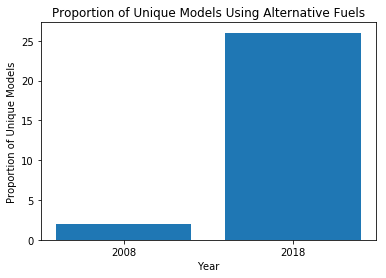

In [6]:
plt.bar(["2008", "2018"], [alter_08, alter_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

The number of unique models using alternative sources of fuel increased by 24.

In [7]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [8]:
# proportions
prop_08 = alter_08/total_08
prop_18 = alter_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

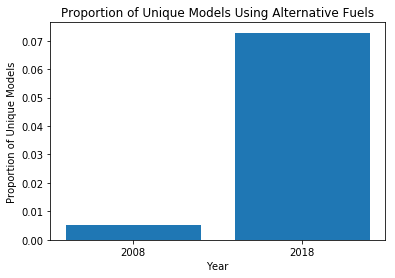

In [9]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

- lets look at the fuel economy for each vehicle class for both years

In [10]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [11]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [12]:
# how much they have increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

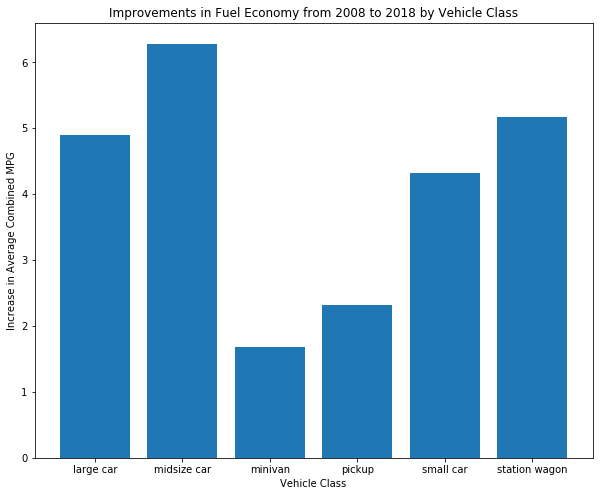

In [13]:
# plot the classes that exist in both years
inc.dropna(inplace = True)
plt.subplots(figsize=(10,8))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.


In [20]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [15]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')
smart_08.describe()


,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


Use what you've learned so for to further explore this dataset on 2008 smartway vehicles.


In [16]:
# smartway labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [25]:
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?

We can explore the trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. for example, you can select all vehicles that having the top 50% fuel economy!

In [26]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [27]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000
